In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [76]:
df_train = pd.read_csv("InsNova_data_2023_train.csv")

In [77]:
df_train.shape

(22619, 22)

In [78]:
df_train

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,67.0,black,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.000000
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,76.0,white,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.000000
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,58.0,black,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.000000
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,72.0,white,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.000000
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,91.0,white,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22614,22615,3.71,0.580943,STNWG,2,F,B,2,petrol,154,92.0,gray,M,1,weekday,6pm - 12am,12,654.451512,0.0,1,1,280.403348
22615,22616,0.77,0.636641,SEDAN,4,F,C,6,petrol,160,74.0,white,M,1,weekday,12pm - 6pm,12,641.163999,0.0,0,0,0.000000
22616,22617,1.95,0.709227,HBACK,1,M,C,6,petrol,146,58.0,black,M,1,weekday,12am - 6 am,12,649.644433,0.0,1,2,1253.261110
22617,22618,3.80,0.600221,TRUCK,2,M,A,4,petrol,284,41.0,red,S,0,weekday,6pm - 12am,12,653.024119,0.0,0,0,0.000000


In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22619 entries, 0 to 22618
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22619 non-null  int64  
 1   veh_value              22619 non-null  float64
 2   exposure               22619 non-null  float64
 3   veh_body               22619 non-null  object 
 4   veh_age                22619 non-null  int64  
 5   gender                 22619 non-null  object 
 6   area                   22619 non-null  object 
 7   agecat                 22619 non-null  int64  
 8   engine_type            22619 non-null  object 
 9   max_power              22619 non-null  int64  
 10  driving_history_score  22619 non-null  float64
 11  veh_color              22619 non-null  object 
 12  marital_status         22619 non-null  object 
 13  e_bill                 22619 non-null  int64  
 14  time_of_week_driven    22619 non-null  object 
 15  ti

In [70]:
col_categories = ['veh_body', 'veh_age', 'gender', 'area',
                  'agecat', 'engine_type',
                  'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven',
                  'time_driven', 'trm_len', 'high_education_ind']

num_cols = [i for i in df_train.columns if i not in col_categories + ['claimcst0', 'clm', 'numclaims']]

In [71]:
num_cols

['id',
 'veh_value',
 'exposure',
 'max_power',
 'driving_history_score',
 'credit_score']

In [72]:
label_encoder = OrdinalEncoder()
df_train[col_categories] = label_encoder.fit_transform(df_train[col_categories])

In [6]:
# df_train['agecat'] = label_encoder.fit_transform(df_train['agecat'])

In [7]:
# df_train['veh_age'] = label_encoder.fit_transform(df_train['veh_age'])

In [8]:
# df_train['veh_body'] = label_encoder.fit_transform(df_train['veh_body'])

In [9]:
# df_train['gender'] = label_encoder.fit_transform(df_train['gender'])

In [10]:
# df_train['area'] = label_encoder.fit_transform(df_train['area'])

In [11]:
# df_train['engine_type'] = label_encoder.fit_transform(df_train['engine_type'])

In [12]:
# df_train['veh_color'] = label_encoder.fit_transform(df_train['veh_color'])

In [13]:
# df_train['marital_status'] = label_encoder.fit_transform(df_train['marital_status'])

In [14]:
# df_train['time_of_week_driven'] = label_encoder.fit_transform(df_train['time_of_week_driven'])

In [15]:
# df_train['time_driven'] = label_encoder.fit_transform(df_train['time_driven'])

In [16]:
# df_train['high_education_ind'] = label_encoder.fit_transform(df_train['high_education_ind'])

In [17]:
# df_train['trm_len'] = label_encoder.fit_transform(df_train['trm_len'])

In [18]:
df_cont = df_train[["veh_value", "exposure", 
                  "driving_history_score", "credit_score", 'max_power']]

In [19]:
df_train.veh_age.unique(), df_train.agecat.unique(), df_train.e_bill.unique()


(array([3, 0, 2, 1]), array([2, 3, 4, 1, 0, 5]), array([1, 0]))

In [20]:
df_train.trm_len.unique(), df_train.clm.unique(), df_train.numclaims.unique(), 

(array([0, 1]), array([0, 1]), array([0, 1, 2, 3]))

In [21]:
df_train.high_education_ind.unique(), df_train.time_driven.unique()

(array([1, 0]), array([3, 2, 1, 0]))

In [22]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.reset_option("max_columns")
# pd.reset_option("max_rows")



In [23]:
df_cont.corr(numeric_only=True)

,veh_value,exposure,driving_history_score,credit_score,max_power
veh_value,1.000000,-0.000279,0.010630,-0.002800,0.190229
exposure,-0.000279,1.000000,-0.005429,-0.081266,-0.001208
driving_history_score,0.010630,-0.005429,1.000000,-0.003909,0.002779
credit_score,-0.002800,-0.081266,-0.003909,1.000000,0.002260
max_power,0.190229,-0.001208,0.002779,0.002260,1.000000


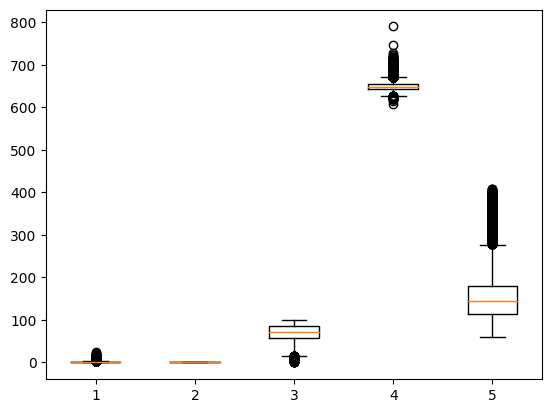

In [24]:
plt.boxplot(df_cont)
plt.show()

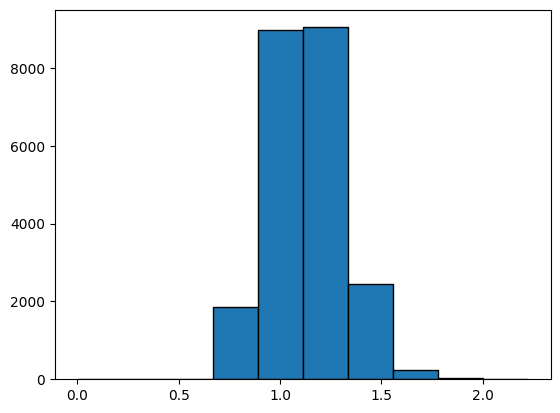

In [25]:
plt.hist((df_cont.veh_value ** (1/4)), edgecolor='k')
plt.show()

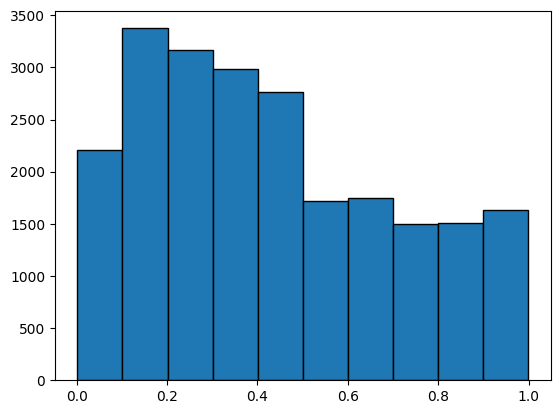

In [26]:
plt.hist((df_cont.exposure), edgecolor='k') # 'bar', 'barstacked', 'step', 'stepfilled'
plt.show()

In [27]:
scaler = MinMaxScaler()
print(scaler.fit(df_cont))
trans_dhs = scaler.transform(df_cont)

MinMaxScaler()


In [28]:
trans = pd.DataFrame(trans_dhs, columns=['veh_value', 'exposure', 'driving_history_score', 'credit_score', 'max_power'])

In [29]:
df_train.veh_value = trans.veh_value

In [30]:
df_train.exposure = trans.exposure

In [31]:
df_train.driving_history_score = trans.driving_history_score

In [32]:
df_train.max_power = trans.max_power

In [33]:
df_train.credit_score = trans.credit_score

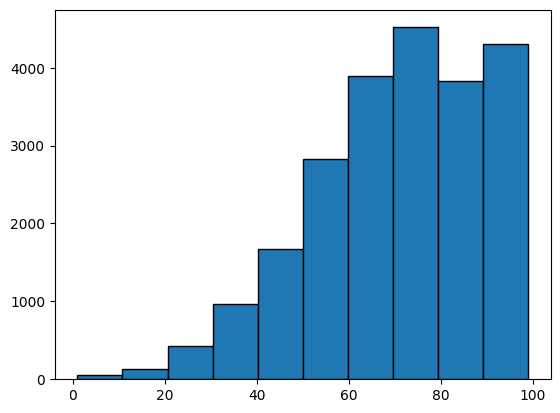

In [34]:
plt.hist(df_cont.driving_history_score, edgecolor='k')
plt.show()

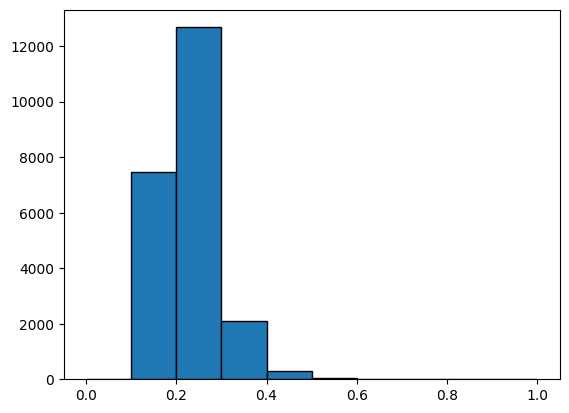

In [35]:
plt.hist(df_train.credit_score, edgecolor='k')
plt.show()

In [36]:
pd.set_option('display.max_columns', None)
df_train

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.031416,0.443805,9,3,1,3,2,3,0.249284,0.673469,0,1,1,0,3,0,0.178846,1,0,0,0.000000
1,2,0.181559,0.561764,10,0,1,0,2,3,0.280802,0.765306,7,1,1,0,2,1,0.416034,0,0,0,0.000000
2,3,0.199918,0.464594,10,0,0,0,2,3,0.283668,0.581633,0,0,1,0,3,0,0.251194,1,0,0,0.000000
3,4,0.019584,0.269926,7,3,1,0,3,3,0.057307,0.724490,7,1,1,0,1,1,0.190495,0,0,0,0.000000
4,5,0.034680,0.140203,9,3,0,0,4,3,0.189112,0.918367,7,1,0,0,2,0,0.215693,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22614,22615,0.151367,0.580569,10,1,0,1,1,3,0.269341,0.928571,3,0,1,0,3,1,0.255551,0,1,1,280.403348
22615,22616,0.031416,0.636400,9,3,0,2,5,3,0.286533,0.744898,7,0,1,0,1,1,0.182768,0,0,0,0.000000
22616,22617,0.079559,0.709158,3,0,1,2,5,3,0.246418,0.581633,0,0,1,0,0,1,0.229220,0,1,2,1253.261110
22617,22618,0.155039,0.599892,11,1,1,0,3,3,0.641834,0.408163,5,1,0,0,3,1,0.247732,0,0,0,0.000000


In [37]:
df_train.high_education_ind.unique()

array([1, 0])

In [38]:
var_cols = [c for c in df_train.columns if c not in ['clm', 'numclaims', 'claimcst0']]

In [39]:
X = df_train.loc[:, var_cols]
Y = df_train.loc[:, 'claimcst0']

In [40]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((18095, 19), (4524, 19), (18095,), (4524,))

In [42]:
X_train

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
9555,9556,0.068135,0.854609,4,2,0,2,3,3,0.418338,0.632653,0,0,0,0,1,1,0.187809,0
7775,7776,0.083231,0.775563,10,1,1,0,2,0,0.246418,0.887755,0,0,1,0,0,1,0.180034,0
8510,8511,0.095063,0.234218,9,2,1,2,1,3,0.286533,0.969388,0,0,0,0,1,0,0.204740,0
19781,19782,0.055080,0.096595,3,0,0,2,1,3,0.074499,0.448980,7,0,0,1,2,1,0.204971,0
14049,14050,0.035496,0.350036,3,2,0,3,3,3,0.094556,0.969388,0,1,1,0,0,0,0.182006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,11965,0.045288,0.722612,2,3,0,2,2,3,0.538682,0.387755,7,0,1,0,1,1,0.183459,0
21575,21576,0.050184,0.188904,10,3,0,5,1,0,0.275072,0.591837,7,0,0,0,2,0,0.196582,0
5390,5391,0.060792,0.446367,3,0,0,2,3,3,0.275072,0.612245,8,1,1,0,1,1,0.222609,0
860,861,0.036720,0.800764,3,2,0,0,3,3,0.137536,0.520408,7,0,0,0,1,1,0.228858,0


In [43]:
X_val

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
8294,8295,0.223990,0.242435,10,0,1,0,2,0,0.246418,0.551020,0,1,1,0,1,1,0.198802,0
17623,17624,0.046920,0.506345,9,2,0,2,2,0,0.389685,0.612245,0,1,1,1,2,1,0.173141,0
3801,3802,0.073439,0.555050,11,0,1,1,1,0,0.954155,0.683673,1,0,0,1,1,1,0.420373,0
12864,12865,0.170951,0.492263,10,0,1,1,3,3,0.378223,0.867347,2,0,1,0,2,0,0.233300,1
6494,6495,0.056304,0.553773,9,2,0,2,3,3,0.151862,0.632653,7,1,1,0,1,1,0.226900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,16696,0.047736,0.156633,3,1,0,2,2,3,0.040115,0.612245,0,0,1,0,1,0,0.333296,0
21464,21465,0.066911,0.693364,3,1,0,2,2,3,0.217765,0.591837,5,0,0,0,3,1,0.218499,0
18363,18364,0.131375,0.363125,10,0,0,0,2,3,0.404011,0.469388,6,0,1,0,1,1,0.219529,0
2906,2907,0.072215,0.600215,9,1,0,2,3,3,0.383954,0.632653,3,0,1,0,1,1,0.189644,0


In [47]:
X_t = X_train[['exposure', 'id', 'veh_value', 'credit_score', 'max_power', 'driving_history_score']]

In [49]:
X_v = X_val[['exposure', 'id', 'veh_value', 'credit_score', 'max_power', 'driving_history_score']]

In [50]:
X_v

,exposure,id,veh_value,credit_score,max_power,driving_history_score
8294,0.242435,8295,0.223990,0.198802,0.246418,0.551020
17623,0.506345,17624,0.046920,0.173141,0.389685,0.612245
3801,0.555050,3802,0.073439,0.420373,0.954155,0.683673
12864,0.492263,12865,0.170951,0.233300,0.378223,0.867347
6494,0.553773,6495,0.056304,0.226900,0.151862,0.632653
...,...,...,...,...,...,...
16695,0.156633,16696,0.047736,0.333296,0.040115,0.612245
21464,0.693364,21465,0.066911,0.218499,0.217765,0.591837
18363,0.363125,18364,0.131375,0.219529,0.404011,0.469388
2906,0.600215,2907,0.072215,0.189644,0.383954,0.632653


In [51]:
train_data = lgb.Dataset(X_t, label=Y_train)
val_data = lgb.Dataset(X_v, label=Y_val)

In [111]:
params = {'task': 'train',
         'objective': 'regression',
         'metric': ['l1', 'l2'],
         'boosting': 'gbdt',
         'num_leaves': 20,
         'feature_fraction': 0.5,
         'bagging_fraction': 0.7,
         'bagging_freq': 10,
         'learning_rate': 0.01,
         'early_stopping_round': 30,
         'verbose': 0,
         'max_depth': 8,
         'max_bin': 100,
         'num_iterations': 100000
         }

In [112]:
model = lgb.LGBMRegressor(**params)

In [113]:
model.fit(X_train, Y_train,
         eval_set=[(X_val, Y_val)],
         eval_metric='l1')

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ign

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting='gbdt',
              early_stopping_round=30, feature_fraction=0.5, learning_rate=0.01,
              max_bin=100, max_depth=8, metric=['l1', 'l2'],
              num_iterations=100000, num_leaves=20, objective='regression',
              task='train', verbose=0)

In [120]:
y_pred = model.predict(X_train, num_iteration=model.best_iteration_)
y_pred

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


array([163.02572355, 202.44774731, 143.23042881, ..., 139.6795065 ,
       151.64135824, 164.43567436])

In [119]:
Y_train

9555     0.0
7775     0.0
8510     0.0
19781    0.0
14049    0.0
        ... 
11964    0.0
21575    0.0
5390     0.0
860      0.0
15795    0.0
Name: claimcst0, Length: 18095, dtype: float64

In [57]:
model_lgbm = lgb.train(params, 
                       train_data,
                       valid_sets=val_data,
                       num_boost_round=5000)

In [58]:
model_lgbm.best_score

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('l2', 1957153.0759874987)])})

In [ ]:
lgb.plot_importance(model_lgbm, height=.5)

In [ ]:
X_train[['exposure', 'id', 'veh_value', 'credit_score', 'max_power', 'driving_history_score']]

In [ ]:
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
model_lgbm_cv = lgb.cv(params, 
                       lgb.Dataset(X, label=Y),
                       num_boost_round=5000,
                       folds=kf.split(X),
                       metrics='mse')

In [ ]:
model_lgbm_cv